# HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

# Objective:
**To build a machine learning model that can accurately identify fraudulent health insurance claims based on patient, provider, claim, and medical information, helping insurance companies reduce financial losses and detect fraud early.**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Beneficiary Data
Train_bene = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
Test_bene = pd.read_csv("Test_Beneficiarydata-1542969243754.csv")

In [3]:
# Inpatient Data
Train_inpa = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
Test_inpa = pd.read_csv("Test_Inpatientdata-1542969243754.csv")

In [4]:
# Outpatient Data
Train_outpa = pd.read_csv("Train_Outpatientdata-1542865627584.csv")
Test_outpa = pd.read_csv("Test_Outpatientdata-1542969243754.csv")

In [5]:
# Target Data
Train_target = pd.read_csv("Train-1542865627584.csv")
Test_target = pd.read_csv("Test-1542969243754.csv")

In [6]:
# Concatenate Train and Test Data
beneficiary = pd.concat([Train_bene,Test_bene], axis=0, ignore_index = True)
inpatient = pd.concat([Train_inpa,Test_inpa], axis=0, ignore_index = True)
outpatient = pd.concat([Train_outpa,Test_outpa],axis=0, ignore_index = True)
target = pd.concat([Train_target,Test_target], axis=0, ignore_index = True)

In [7]:
beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [8]:
inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [9]:
outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [10]:
target.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

In [11]:
# Inpatient, Outpatient - both are same structure of features
inpa_outpa = pd.concat([inpatient, outpatient], axis=0, ignore_index = True)

In [12]:
# Merge beneficiary and inpa_outpa dataset
merge_df = inpa_outpa.merge(beneficiary, on="BeneID", how="left")

In [13]:
# Now merge with target dataset
df = merge_df.merge(target, on="Provider", how="left")

In [14]:
# show first 5 rows data 
df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
2,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
4,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No


In [15]:
# show last 5 rows data
df.tail()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
1057411,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,NaN,...,2,2,2,2,2,0,0,110,50,NaN
1057412,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,NaN,...,2,2,2,2,2,0,0,430,460,NaN
1057413,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,NaN,...,2,2,2,2,2,0,0,430,460,NaN
1057414,BENE159197,CLM357675,2009-05-13,2009-05-13,PRV52983,2500,PHY354437,NaN,NaN,NaN,...,2,1,2,2,2,0,0,2650,10,NaN
1057415,BENE159197,CLM357675,2009-05-13,2009-05-13,PRV52983,2500,PHY354437,NaN,NaN,NaN,...,2,1,2,2,2,0,0,2650,10,NaN


In [16]:
# Check feature names
df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [17]:
# shape of dataset
df.shape

(1057416, 55)

In [18]:
# Find datatypes of features
df.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                        object
ClaimEndDt                          object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
AdmissionDt                         object
ClmAdmitDiagnosisCode               object
DeductibleAmtPaid                  float64
DischargeDt                         object
DiagnosisGroupCode                  object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosi

In [19]:
# Find null values
df.isna().sum()

BeneID                                   0
ClaimID                                  0
ClaimStartDt                             0
ClaimEndDt                               0
Provider                                 0
InscClaimAmtReimbursed                   0
AttendingPhysician                    2853
OperatingPhysician                  841547
OtherPhysician                      681566
AdmissionDt                         980589
ClmAdmitDiagnosisCode               779352
DeductibleAmtPaid                     1787
DischargeDt                         980589
DiagnosisGroupCode                  980589
ClmDiagnosisCode_1                   19724
ClmDiagnosisCode_2                  369235
ClmDiagnosisCode_3                  595204
ClmDiagnosisCode_4                  744555
ClmDiagnosisCode_5                  844910
ClmDiagnosisCode_6                  897109
ClmDiagnosisCode_7                  931416
ClmDiagnosisCode_8                  955420
ClmDiagnosisCode_9                  977662
ClmDiagnosi

In [20]:
# find duplicates
df.duplicated().sum()

np.int64(363813)

In [21]:
df.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,1.057416e+06,1.055629e+06,44101.000000,10283.000000,1821.000000,218.000000,16.000000,0.0,1.057416e+06,1.057416e+06,...,1.057416e+06,1.057416e+06,1.057416e+06,1.057416e+06,1.057416e+06,1.057416e+06,1.057416e+06,1.057416e+06,1.057416e+06,1.057416e+06
mean,1.003143e+03,7.848979e+01,5904.899027,4114.505397,4210.219660,4135.201835,5392.500000,NaN,1.579160e+00,1.252471e+00,...,1.552267e+00,1.276908e+00,1.227297e+00,1.676178e+00,1.680381e+00,1.893055e+00,5.669012e+03,6.163564e+02,2.463559e+03,6.989866e+02
std,3.821795e+03,2.741524e+02,3051.909600,2038.954664,2218.846569,2220.874483,2844.148097,NaN,4.936942e-01,7.139441e-01,...,4.972609e-01,4.474709e-01,4.190865e-01,4.679334e-01,4.663291e-01,3.090430e-01,1.225608e+04,1.240228e+03,4.136431e+03,1.058127e+03
min,0.000000e+00,0.000000e+00,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.000000e+03,0.000000e+00,-7.000000e+01,0.000000e+00
25%,4.000000e+01,0.000000e+00,3893.000000,2724.000000,2724.000000,2749.000000,3785.250000,NaN,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,5.300000e+02,1.400000e+02
50%,8.000000e+01,0.000000e+00,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,2.000000e+00,1.000000e+00,...,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.280000e+03,3.800000e+02
75%,3.000000e+02,0.000000e+00,8703.000000,4439.000000,5185.000000,4604.750000,6381.500000,NaN,2.000000e+00,1.000000e+00,...,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.400000e+03,1.068000e+03,2.770000e+03,8.400000e+02
max,1.250000e+05,1.068000e+03,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,2.000000e+00,5.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.614700e+05,3.827200e+04,1.029600e+05,1.384000e+04


# Data Cleaning

In [22]:
# Change all features name letters in lowercase
df.columns = [col.lower() for col in df.columns]

In [23]:
df.columns

Index(['beneid', 'claimid', 'claimstartdt', 'claimenddt', 'provider',
       'inscclaimamtreimbursed', 'attendingphysician', 'operatingphysician',
       'otherphysician', 'admissiondt', 'clmadmitdiagnosiscode',
       'deductibleamtpaid', 'dischargedt', 'diagnosisgroupcode',
       'clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', 'clmdiagnosiscode_5', 'clmdiagnosiscode_6',
       'clmdiagnosiscode_7', 'clmdiagnosiscode_8', 'clmdiagnosiscode_9',
       'clmdiagnosiscode_10', 'clmprocedurecode_1', 'clmprocedurecode_2',
       'clmprocedurecode_3', 'clmprocedurecode_4', 'clmprocedurecode_5',
       'clmprocedurecode_6', 'dob', 'dod', 'gender', 'race',
       'renaldiseaseindicator', 'state', 'county', 'noofmonths_partacov',
       'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccon

In [24]:
# Remove duplicates
df.duplicated().sum()

np.int64(363813)

In [25]:
df = df.drop_duplicates()

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
duplicate_claims = df[df.duplicated(subset='claimid', keep=False)]
print("Rows with duplicate ClaimID:", duplicate_claims.shape[0])

Rows with duplicate ClaimID: 0


In [28]:
df.shape

(693603, 55)

In [29]:
# Missing values handling
df.isna().sum()

beneid                                  0
claimid                                 0
claimstartdt                            0
claimenddt                              0
provider                                0
inscclaimamtreimbursed                  0
attendingphysician                   1855
operatingphysician                 551963
otherphysician                     445235
admissiondt                        643578
clmadmitdiagnosiscode              512348
deductibleamtpaid                    1095
dischargedt                        643578
diagnosisgroupcode                 643578
clmdiagnosiscode_1                  13031
clmdiagnosiscode_2                 243391
clmdiagnosiscode_3                 391900
clmdiagnosiscode_4                 489450
clmdiagnosiscode_5                 554881
clmdiagnosiscode_6                 589051
clmdiagnosiscode_7                 611641
clmdiagnosiscode_8                 627437
clmdiagnosiscode_9                 641912
clmdiagnosiscode_10               

In [30]:
# Drop target column missing value rows
df = df.dropna(subset = ['potentialfraud'])

In [31]:
df.shape

(558211, 55)

In [32]:
missing_per = df.isnull().mean() * 100
print(missing_per.sort_values(ascending=False))

clmprocedurecode_6                 100.000000
clmprocedurecode_5                  99.998388
clmprocedurecode_4                  99.978861
clmprocedurecode_3                  99.826410
dod                                 99.259957
clmdiagnosiscode_10                 99.102490
clmprocedurecode_2                  99.016501
clmprocedurecode_1                  95.824160
diagnosisgroupcode                  92.749337
dischargedt                         92.749337
admissiondt                         92.749337
clmdiagnosiscode_9                  92.509105
clmdiagnosiscode_8                  90.425843
clmdiagnosiscode_7                  88.144805
clmdiagnosiscode_6                  84.881702
clmdiagnosiscode_5                  79.949517
operatingphysician                  79.497538
clmadmitdiagnosiscode               73.863109
clmdiagnosiscode_4                  70.524407
otherphysician                      64.218548
clmdiagnosiscode_3                  56.458221
clmdiagnosiscode_2                

In [33]:
# Drop columns >80% missing
drop_cols = ['clmprocedurecode_6', 'clmprocedurecode_5' ,'clmprocedurecode_4' ,'clmprocedurecode_3' ,'dod' ,'clmdiagnosiscode_10',
             'clmprocedurecode_2' ,'clmprocedurecode_1' ,'diagnosisgroupcode' ,'dischargedt' ,'admissiondt' ,'clmdiagnosiscode_9',
             'clmdiagnosiscode_8','clmdiagnosiscode_7','clmdiagnosiscode_6','clmdiagnosiscode_5']
df.drop(columns=drop_cols, inplace=True)

In [34]:
df.shape

(558211, 39)

In [35]:
# High missing columns - fill + flag
cols_fill_flag = [
    'operatingphysician','clmadmitdiagnosiscode','clmdiagnosiscode_4',
    'otherphysician','clmdiagnosiscode_3','clmdiagnosiscode_2'
]

for col in cols_fill_flag:
    df[col + '_missing'] = df[col].isna().astype(int)
    df[col] = df[col].fillna('Unknown')

In [36]:
# Low missing columns → Simple Fill
df['clmdiagnosiscode_1'] = df['clmdiagnosiscode_1'].fillna('Unknown')
df['attendingphysician'] = df['attendingphysician'].fillna('Unknown')

In [37]:
# Using median for DeductibleAmtPaid
median_value = df['deductibleamtpaid'].median()
df['deductibleamtpaid'] = df['deductibleamtpaid'].fillna(median_value)

In [38]:
df.isnull().sum()

beneid                             0
claimid                            0
claimstartdt                       0
claimenddt                         0
provider                           0
inscclaimamtreimbursed             0
attendingphysician                 0
operatingphysician                 0
otherphysician                     0
clmadmitdiagnosiscode              0
deductibleamtpaid                  0
clmdiagnosiscode_1                 0
clmdiagnosiscode_2                 0
clmdiagnosiscode_3                 0
clmdiagnosiscode_4                 0
dob                                0
gender                             0
race                               0
renaldiseaseindicator              0
state                              0
county                             0
noofmonths_partacov                0
noofmonths_partbcov                0
chroniccond_alzheimer              0
chroniccond_heartfailure           0
chroniccond_kidneydisease          0
chroniccond_cancer                 0
c

In [39]:
df.shape

(558211, 45)

In [40]:
df.dtypes

beneid                              object
claimid                             object
claimstartdt                        object
claimenddt                          object
provider                            object
inscclaimamtreimbursed               int64
attendingphysician                  object
operatingphysician                  object
otherphysician                      object
clmadmitdiagnosiscode               object
deductibleamtpaid                  float64
clmdiagnosiscode_1                  object
clmdiagnosiscode_2                  object
clmdiagnosiscode_3                  object
clmdiagnosiscode_4                  object
dob                                 object
gender                               int64
race                                 int64
renaldiseaseindicator               object
state                                int64
county                               int64
noofmonths_partacov                  int64
noofmonths_partbcov                  int64
chroniccond

In [41]:
# Drop unnecessary columns
df.drop(['beneid', 'claimid'], axis=1, inplace=True)

In [42]:
# Convert dates to datetime
df['dob'] = pd.to_datetime(df['dob'])
df['claimstartdt'] = pd.to_datetime(df['claimstartdt'])
df['claimenddt'] = pd.to_datetime(df['claimenddt'])

In [43]:
# Convert target to int
df['potentialfraud'] = df['potentialfraud'].map({'Yes': 1, 'No': 0})
df['potentialfraud'] = df['potentialfraud'].astype(int)

In [44]:
df['renaldiseaseindicator'].unique()     # should change object into int (0,1 - binary)

array(['0', 'Y'], dtype=object)

In [45]:
df['renaldiseaseindicator'] = df['renaldiseaseindicator'].map({'Y': 1, '0': 0})
df['renaldiseaseindicator'] = df['renaldiseaseindicator'].astype(int)

In [46]:
# Claim duration in days
df['claim_duration'] = (df['claimenddt'] - df['claimstartdt']).dt.days

# Age in years
df['Age'] = (pd.to_datetime('today') - df['dob']).dt.days // 365

In [47]:
# Drop original datetime columns
df = df.drop(columns=['claimstartdt', 'claimenddt', 'dob'])

In [48]:
df.dtypes

provider                            object
inscclaimamtreimbursed               int64
attendingphysician                  object
operatingphysician                  object
otherphysician                      object
clmadmitdiagnosiscode               object
deductibleamtpaid                  float64
clmdiagnosiscode_1                  object
clmdiagnosiscode_2                  object
clmdiagnosiscode_3                  object
clmdiagnosiscode_4                  object
gender                               int64
race                                 int64
renaldiseaseindicator                int64
state                                int64
county                               int64
noofmonths_partacov                  int64
noofmonths_partbcov                  int64
chroniccond_alzheimer                int64
chroniccond_heartfailure             int64
chroniccond_kidneydisease            int64
chroniccond_cancer                   int64
chroniccond_obstrpulmonary           int64
chroniccond

In [49]:
df.shape

(558211, 42)

## EDA (Exploratory Data Analysis)

### Univariate Analysis

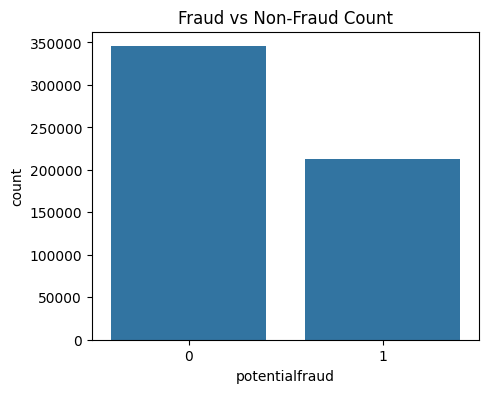

In [50]:
# Target Column plot (class imbalance check) 
plt.figure(figsize=(5,4))
sns.countplot(x='potentialfraud', data=df)
plt.title('Fraud vs Non-Fraud Count')
plt.show()

In [51]:
# target column ratio
print(df['potentialfraud'].value_counts(normalize=True))

potentialfraud
0    0.618789
1    0.381211
Name: proportion, dtype: float64


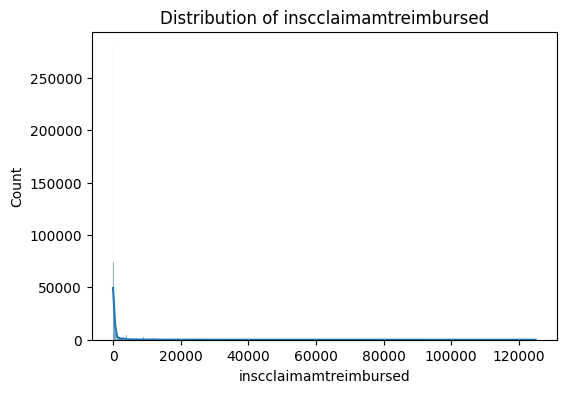

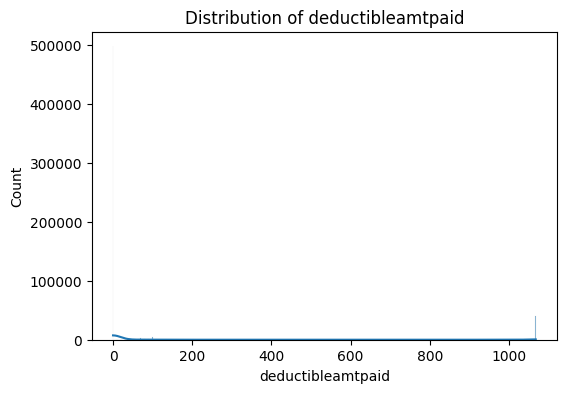

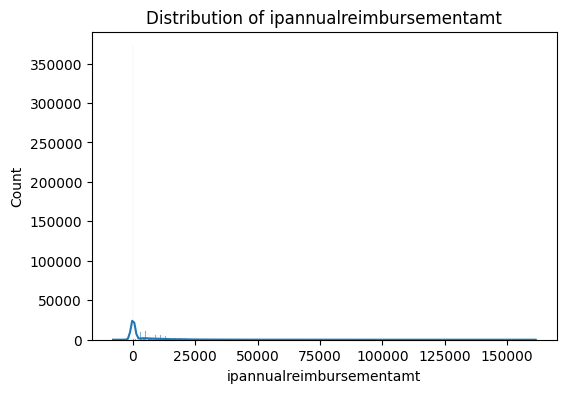

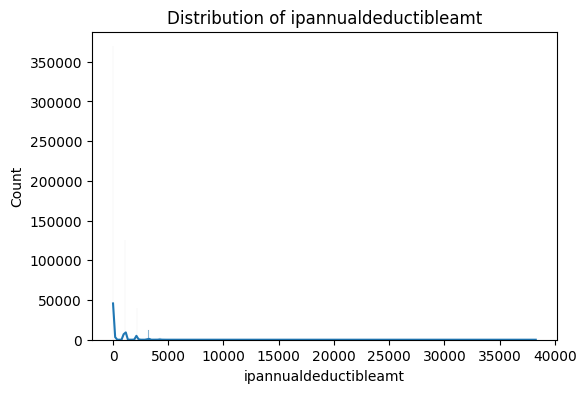

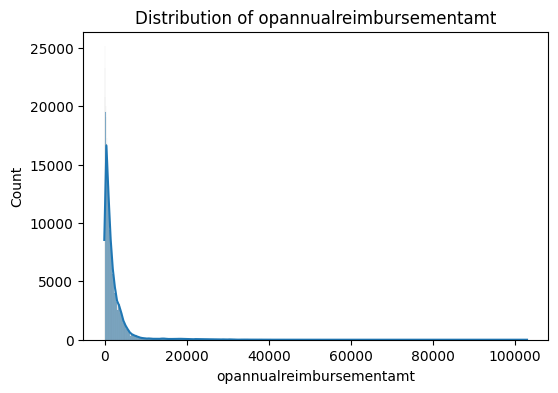

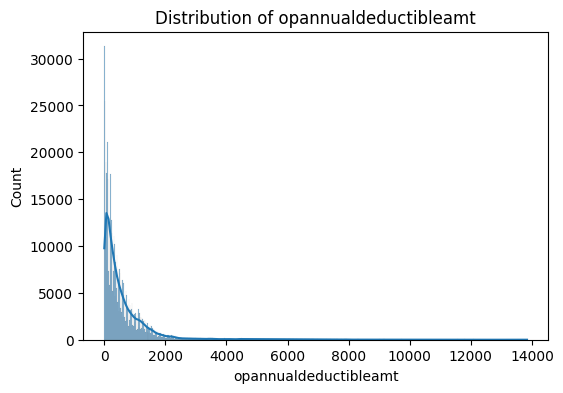

In [52]:
# Continuous numerical column
financial_cols = [
    'inscclaimamtreimbursed',
    'deductibleamtpaid',
    'ipannualreimbursementamt',
    'ipannualdeductibleamt',
    'opannualreimbursementamt',
    'opannualdeductibleamt'
]

for col in financial_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Insights**
- All six features have mostly small values.
- A few people have very high amounts—these are outliers.
- One feature (deductibleamtpaid) has a spike at ₹1000, maybe a fixed policy amount

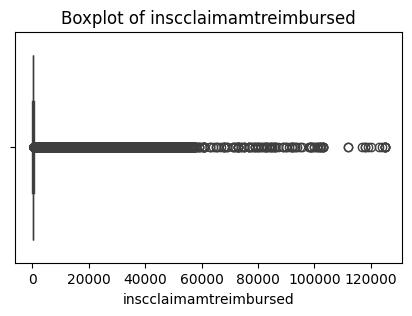

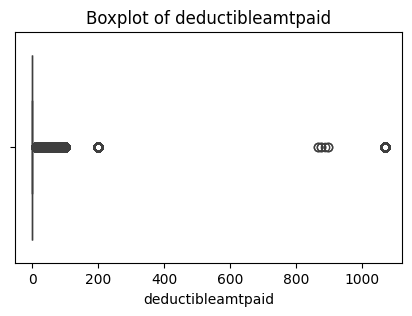

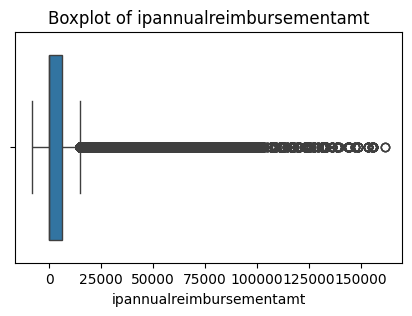

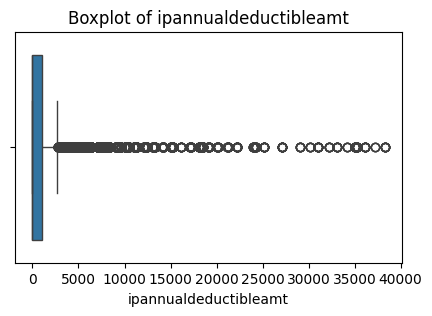

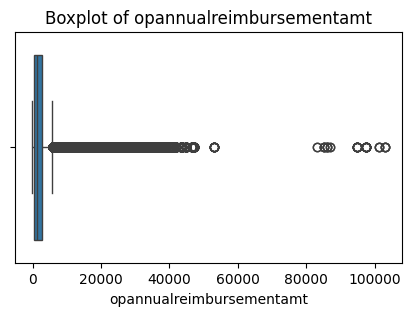

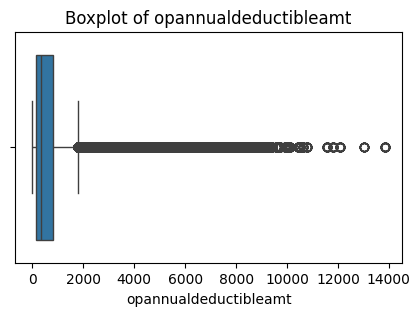

In [53]:
for col in financial_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Insights**
- All six features are right-skewed.
- Most values are clustered near the bottom.
- There are many outliers—especially in reimbursement amounts.
- deductibleamtpaid has a tight range, but still shows a spike at ₹1000.

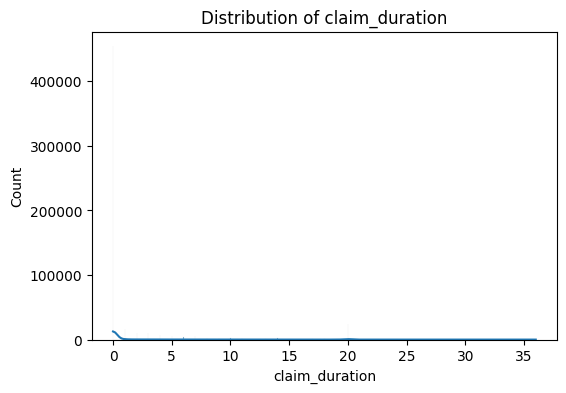

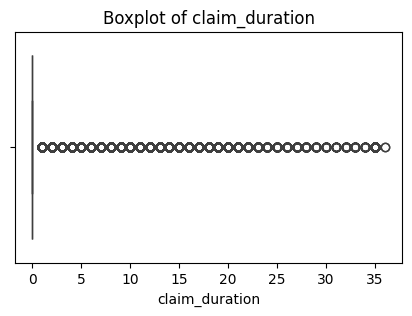

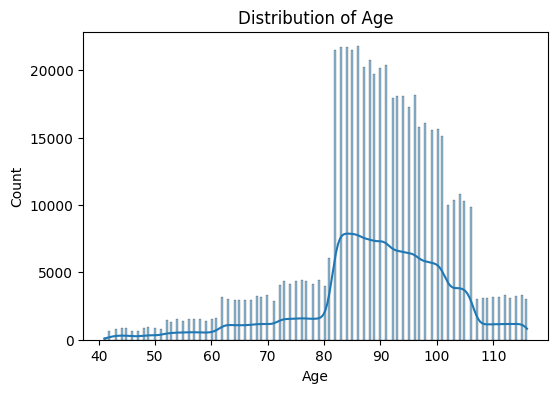

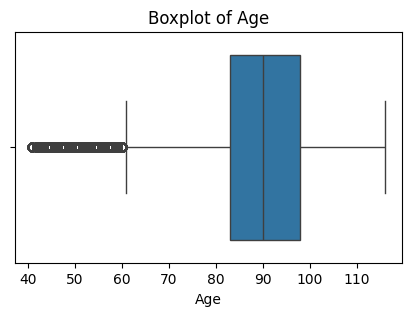

In [54]:
derived_cols = ['claim_duration', 'Age']

for col in derived_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Insights

**Claim Duration**  
- Right-skewed with a long tail; most claims are short-duration.  
- Present in upper range; may impact model performance. (outliers)  

**Age**  
- Sharp peak between 85–95 years.  
- Some younger ages below 70 are low-end outliers  

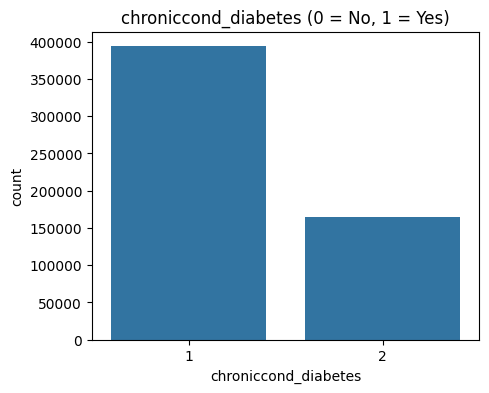

chroniccond_diabetes
1    0.705395
2    0.294605
Name: proportion, dtype: float64


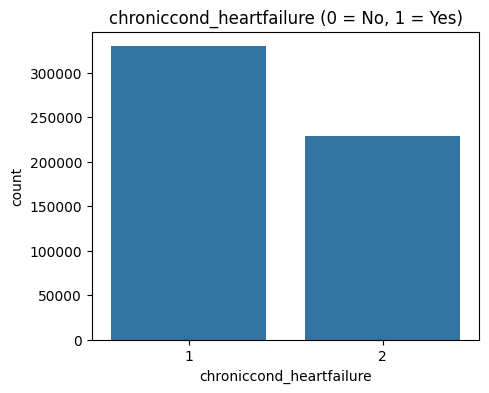

chroniccond_heartfailure
1    0.590427
2    0.409573
Name: proportion, dtype: float64


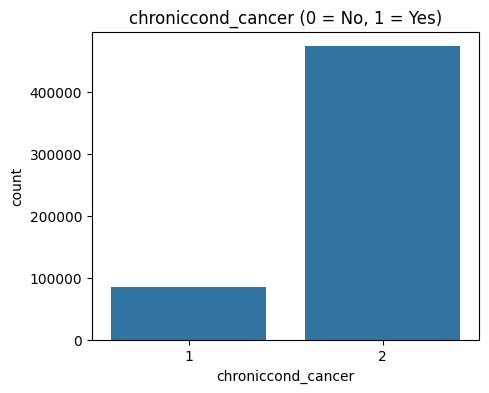

chroniccond_cancer
2    0.848615
1    0.151385
Name: proportion, dtype: float64


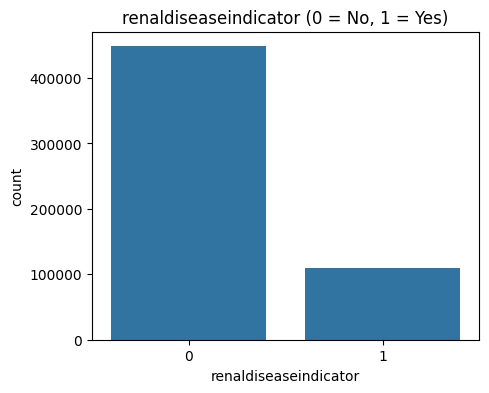

renaldiseaseindicator
0    0.803214
1    0.196786
Name: proportion, dtype: float64


In [55]:
binary_cols = [
    'chroniccond_diabetes',
    'chroniccond_heartfailure',
    'chroniccond_cancer',
    'renaldiseaseindicator'
]

for col in binary_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} (0 = No, 1 = Yes)')
    plt.show()

    print(df[col].value_counts(normalize=True))

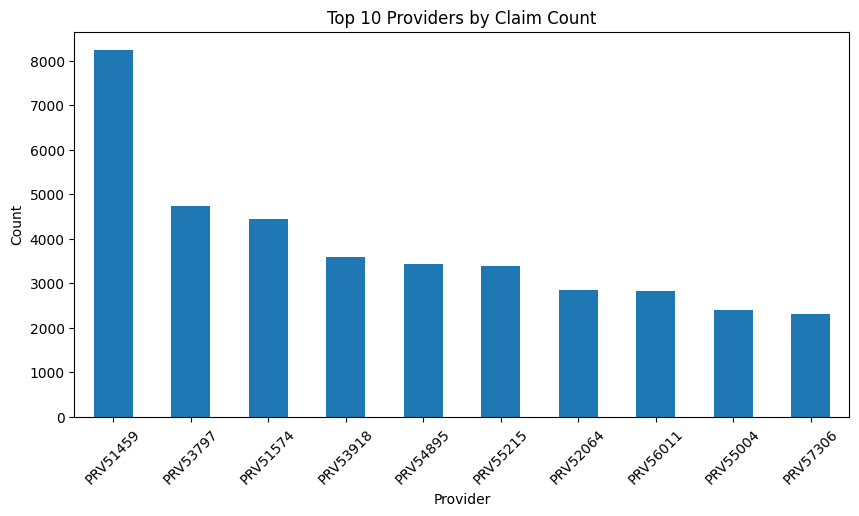

In [56]:
# Top 10 Providers
plt.figure(figsize=(10,5))
df['provider'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Providers by Claim Count')
plt.xlabel('Provider')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

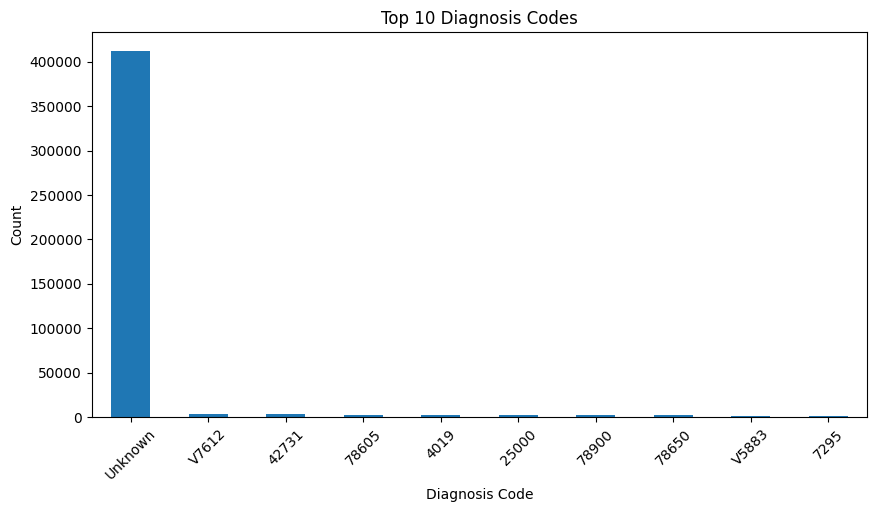

In [57]:
# Top 10 Diagnosis Codes
plt.figure(figsize=(10,5))
df['clmadmitdiagnosiscode'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Diagnosis Codes')
plt.xlabel('Diagnosis Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis

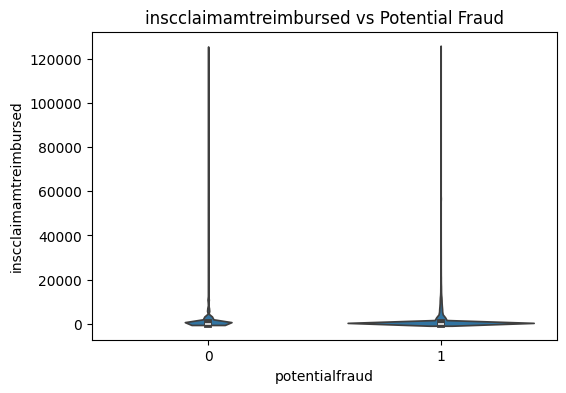

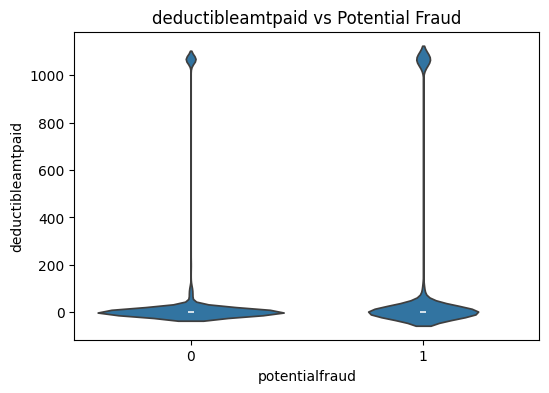

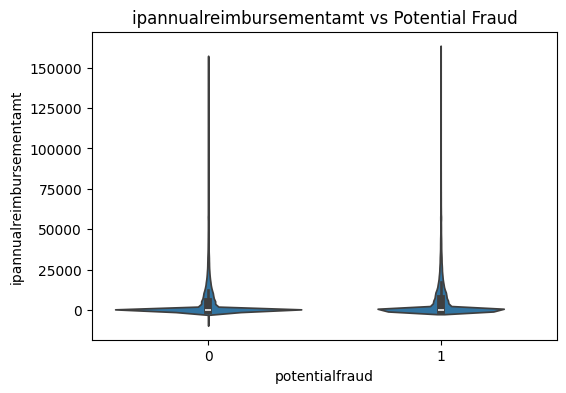

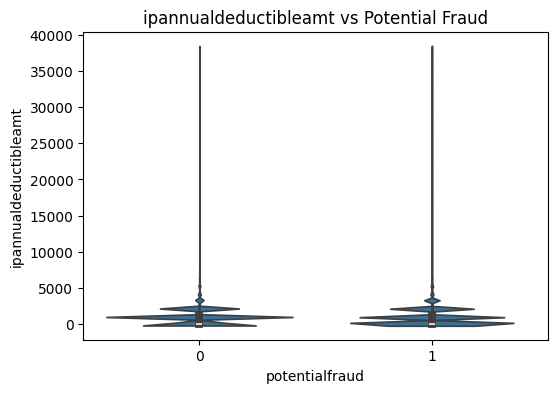

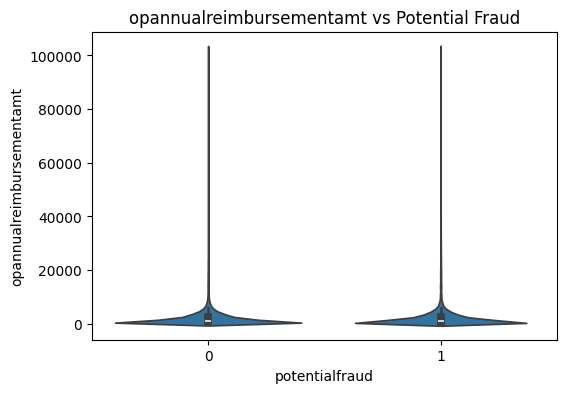

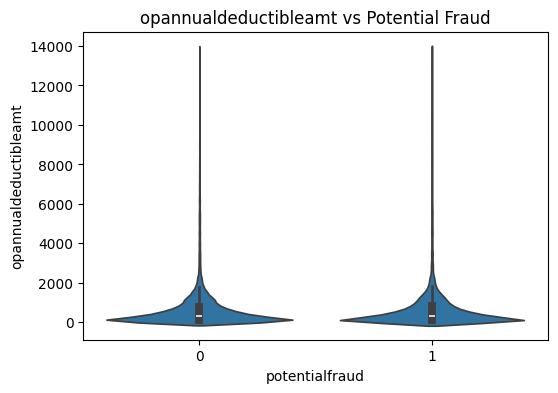

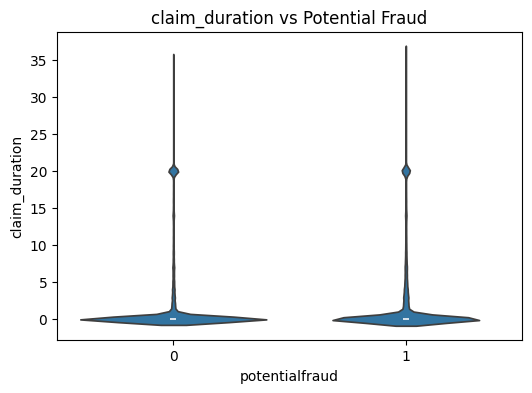

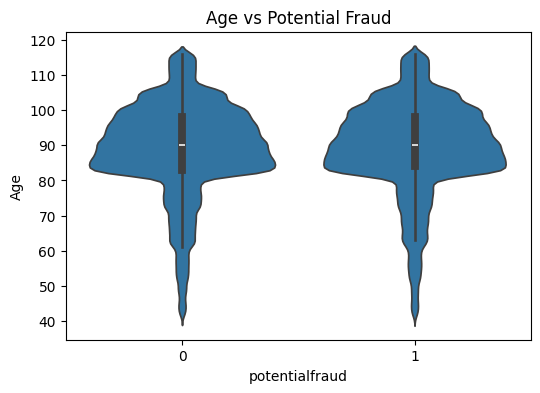

In [58]:
numeric_cols = financial_cols + derived_cols

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='potentialfraud', y=col, data=df)
    plt.title(f'{col} vs Potential Fraud')
    plt.show()

### Fraud Analysis – Insights

**Claim & Deductible Amounts vs Potential Fraud**
- Fraud cases show **more outliers** in claim and deductible amounts.
- **Reimbursed amounts** vary widely in fraud cases.
- **Deductible amounts** have similar medians but more spread in fraud cases.

**Annual Reimbursement & Deductible (IP/OP)**
- Both inpatient and outpatient amounts show **high variability**.
- Outliers are common in both fraud and non-fraud cases.
- Medians are similar → may need deeper feature engineering.

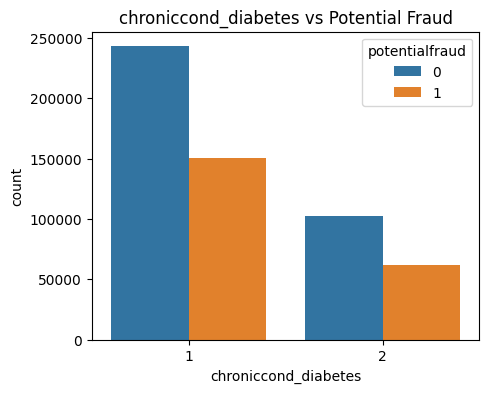

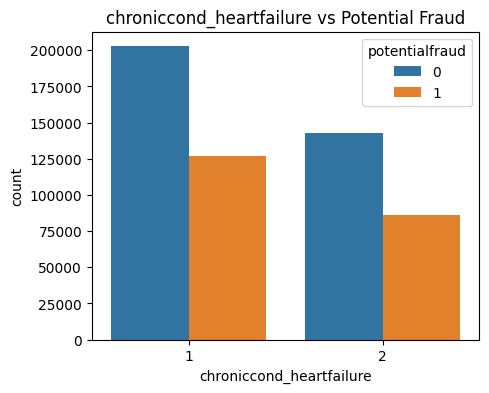

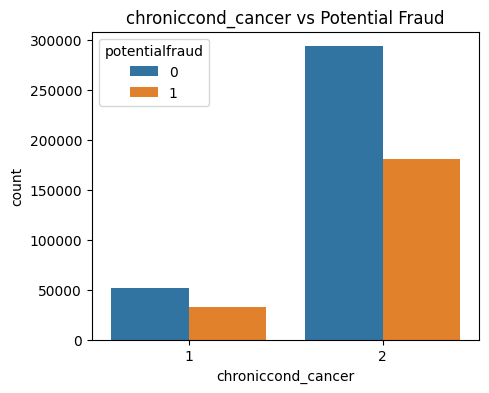

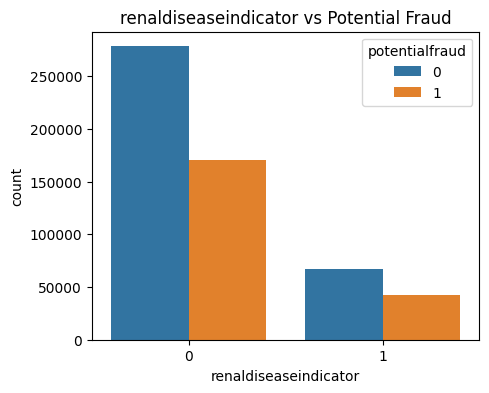

In [59]:
binary_cols = ['chroniccond_diabetes', 'chroniccond_heartfailure', 'chroniccond_cancer', 'renaldiseaseindicator']

for col in binary_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, hue='potentialfraud', data=df)
    plt.title(f'{col} vs Potential Fraud')
    plt.show()

### Chronic Conditions – Fraud Countplot Insights

**Diabetes & Heart Failure**
- More fraud cases in category `2` (likely "No" or "Not Present")
- Suggests fraud may be more common in healthier profiles

**Cancer**
- Category `2` shows higher fraud counts than `1`
- Check encoding: may indicate stronger fraud link with certain cancer status

**Renal Disease**
- Fraud cases higher for `1` (Yes)
- Renal condition might be a useful fraud predictor

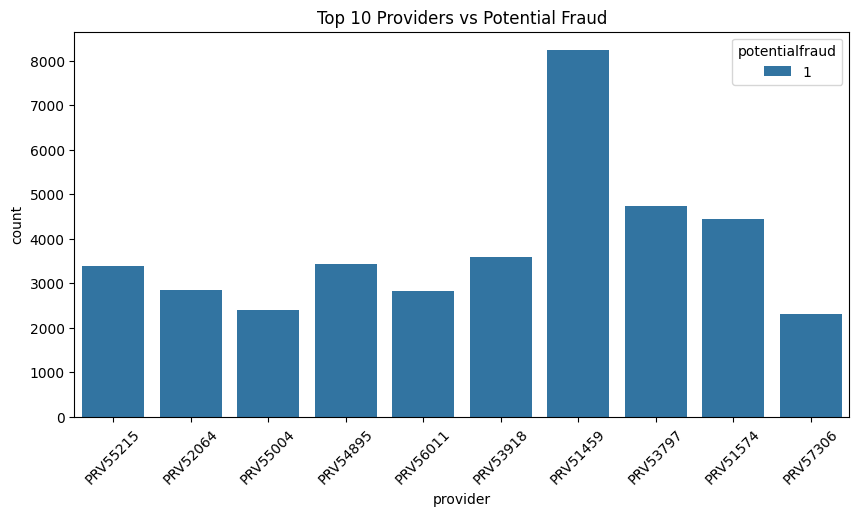

In [60]:
# Top 10 Providers
top_providers = df['provider'].value_counts().head(10).index
df_top_prov = df[df['provider'].isin(top_providers)]

plt.figure(figsize=(10,5))
sns.countplot(x='provider', hue='potentialfraud', data=df_top_prov)
plt.title('Top 10 Providers vs Potential Fraud')
plt.xticks(rotation=45)
plt.show()

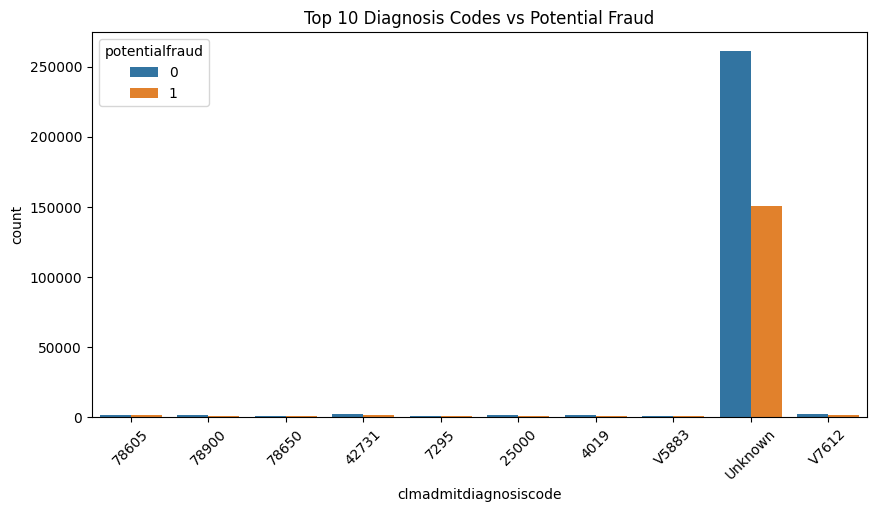

In [61]:
# Top 10 Diagnosis Codes
top_diag = df['clmadmitdiagnosiscode'].value_counts().head(10).index
df_top_diag = df[df['clmadmitdiagnosiscode'].isin(top_diag)]

plt.figure(figsize=(10,5))
sns.countplot(x='clmadmitdiagnosiscode', hue='potentialfraud', data=df_top_diag)
plt.title('Top 10 Diagnosis Codes vs Potential Fraud')
plt.xticks(rotation=45)
plt.show()

<Axes: >

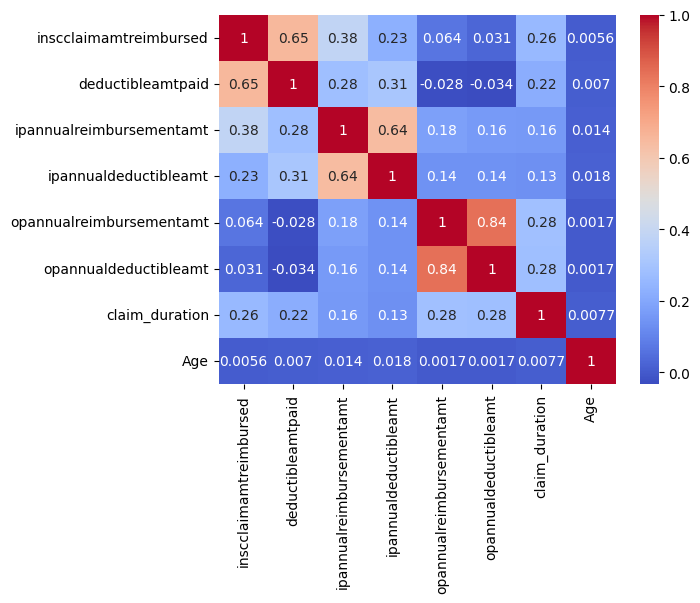

In [62]:
# Correlation & Relationship Checks
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='claim_duration', ylabel='inscclaimamtreimbursed'>

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


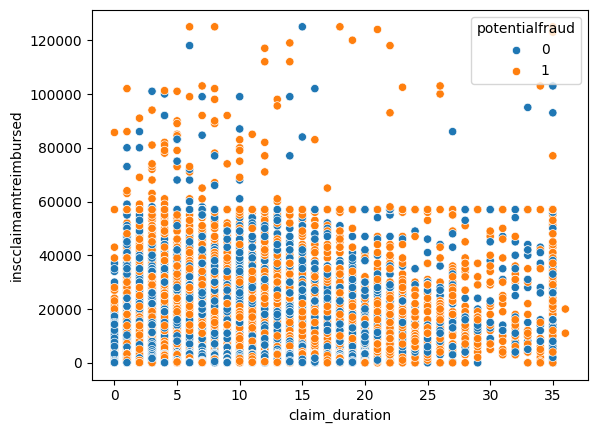

In [63]:
sns.scatterplot(x='claim_duration', y='inscclaimamtreimbursed', hue='potentialfraud', data=df)

## Scatter Plot Insights

- Claims marked as **potential fraud ("Yes")** tend to have **shorter durations** and **lower reimbursed amounts**.
- Non-fraud claims ("No") show **more spread** across both duration and reimbursement.
- No clear linear pattern, but fraud cases cluster in the **lower-left** region of the plot.

## Preprocessing

## Outliers

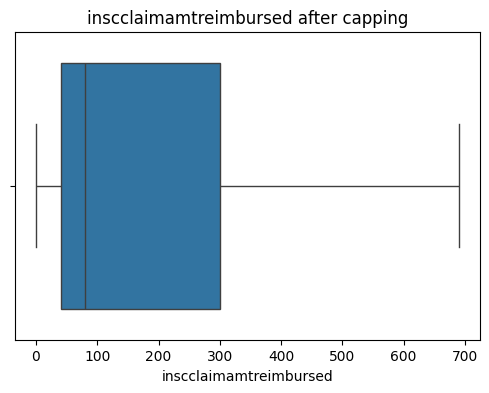

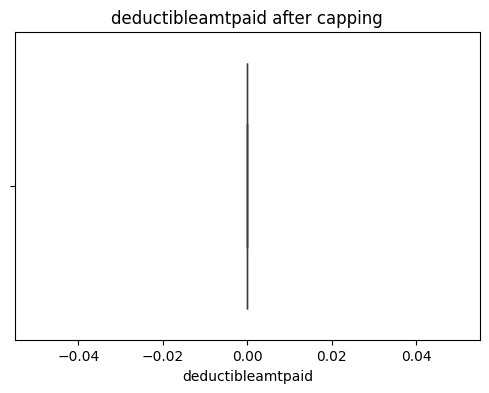

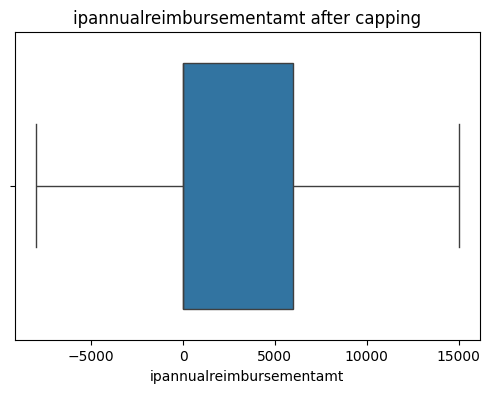

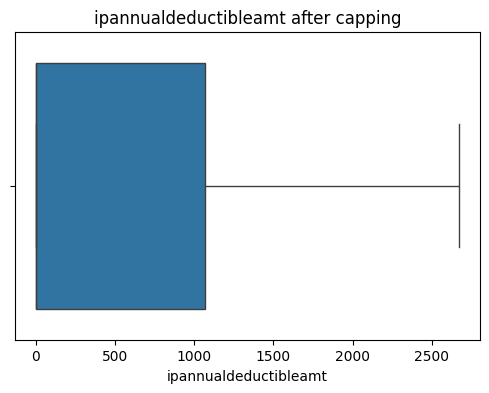

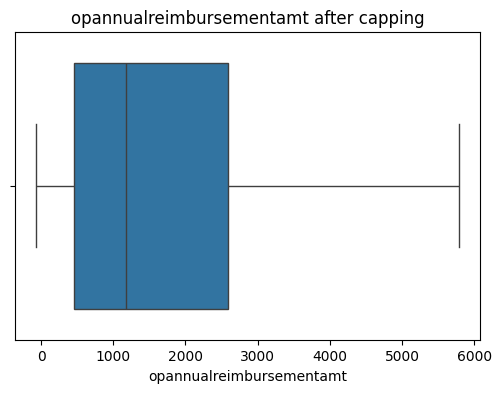

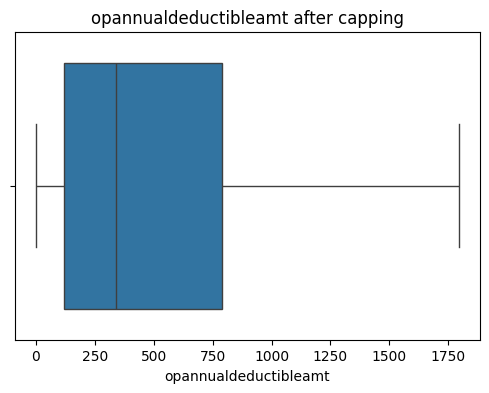

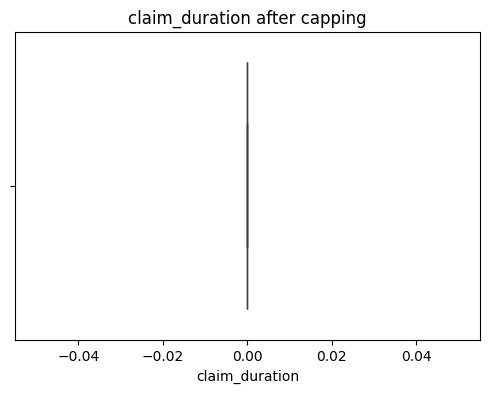

In [64]:
# Outlier handling
num_cols = [
    'inscclaimamtreimbursed',
    'deductibleamtpaid',
    'ipannualreimbursementamt',
    'ipannualdeductibleamt',
    'opannualreimbursementamt',
    'opannualdeductibleamt',
    'claim_duration'
]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'{col} after capping')
    plt.show()

## Encoding

In [65]:
# List all high-cardinality categorical columns 
high_card_cols = [
    'provider', 'attendingphysician', 'operatingphysician', 'otherphysician',
    'clmadmitdiagnosiscode', 'clmdiagnosiscode_1', 'clmdiagnosiscode_2',
    'clmdiagnosiscode_3', 'clmdiagnosiscode_4', 'state', 'county'
]

# Apply frequency encoding
for col in high_card_cols:
    freq = df[col].value_counts() / len(df)
    df[col] = df[col].map(freq)

In [66]:
# Seperate Features and target
X = df.drop(columns=['potentialfraud'])
y = df['potentialfraud']

In [67]:
X

,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,clmadmitdiagnosiscode,deductibleamtpaid,clmdiagnosiscode_1,clmdiagnosiscode_2,clmdiagnosiscode_3,...,opannualreimbursementamt,opannualdeductibleamt,operatingphysician_missing,clmadmitdiagnosiscode_missing,clmdiagnosiscode_4_missing,otherphysician_missing,clmdiagnosiscode_3_missing,clmdiagnosiscode_2_missing,claim_duration,Age
0,0.000192,690.0,0.000002,0.794975,0.642185,0.000451,0.0,0.000118,0.040089,0.001066,...,60.0,70.0,1,0,0,1,0,0,0.0,82
2,0.000435,690.0,0.000004,0.000002,0.642185,0.000007,0.0,0.000038,0.002232,0.001112,...,60.0,70.0,0,0,1,1,0,0,0.0,82
4,0.000036,690.0,0.000009,0.794975,0.000009,0.000251,0.0,0.000229,0.000236,0.001279,...,60.0,70.0,1,0,0,0,0,0,0.0,82
6,0.000159,690.0,0.000063,0.000004,0.000007,0.000161,0.0,0.001247,0.000314,0.000185,...,250.0,320.0,0,0,0,0,0,0,0.0,111
8,0.000047,690.0,0.000004,0.000007,0.642185,0.000296,0.0,0.000161,0.004810,0.000093,...,120.0,100.0,0,0,0,1,0,0,0.0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824334,0.000647,690.0,0.000102,0.000025,0.000233,0.738631,0.0,0.000036,0.000014,0.000061,...,5470.0,1795.0,0,1,1,0,0,0,0.0,73
824335,0.001809,400.0,0.000197,0.000041,0.642185,0.738631,0.0,0.000030,0.000258,0.014235,...,5470.0,1795.0,0,1,1,1,0,0,0.0,73
824336,0.000844,60.0,0.000842,0.794975,0.642185,0.738631,0.0,0.000876,0.006336,0.564582,...,5470.0,1795.0,1,1,1,1,1,0,0.0,73
824337,0.001005,70.0,0.000088,0.794975,0.000113,0.738631,0.0,0.018726,0.350416,0.564582,...,5470.0,1795.0,1,1,1,0,1,1,0.0,73


In [68]:
y

0         1
2         0
4         0
6         0
8         0
         ..
824334    0
824335    0
824336    0
824337    0
824338    0
Name: potentialfraud, Length: 558211, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

# Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [70]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: potentialfraud
0    276432
1    170136
Name: count, dtype: int64
After SMOTE: potentialfraud
0    276432
1    276432
Name: count, dtype: int64


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)  # fit & transform on train_resampled
X_test = scaler.transform(X_test)                # only transform test

## Data Modeling

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
log_reg = LogisticRegression(random_state=42)

In [73]:
# Train
log_reg.fit(X_train_res, y_train_res)

# Predict
y_pred = log_reg.predict(X_test)

In [74]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8088818824288133

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85     68983
           1       0.81      0.65      0.72     42660

    accuracy                           0.81    111643
   macro avg       0.81      0.78      0.79    111643
weighted avg       0.81      0.81      0.80    111643


Confusion Matrix:
 [[62533  6450]
 [14887 27773]]


In [75]:
log_reg.fit(X_test, y_test)

y_pred = log_reg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8105926927796637

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86     68983
           1       0.83      0.64      0.72     42660

    accuracy                           0.81    111643
   macro avg       0.82      0.78      0.79    111643
weighted avg       0.81      0.81      0.80    111643


Confusion Matrix:
 [[63345  5638]
 [15508 27152]]


In [82]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
knn = KNeighborsClassifier()

In [83]:
# Train
knn.fit(X_train_res, y_train_res)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [84]:
# Predict
y_pred = knn.predict(X_test)

In [85]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7014591152154636

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77     68983
           1       0.63      0.53      0.58     42660

    accuracy                           0.70    111643
   macro avg       0.68      0.67      0.67    111643
weighted avg       0.70      0.70      0.70    111643


Confusion Matrix:
 [[55683 13300]
 [20030 22630]]


In [86]:
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7926874053903962

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.85     68983
           1       0.82      0.59      0.68     42660

    accuracy                           0.79    111643
   macro avg       0.80      0.75      0.76    111643
weighted avg       0.80      0.79      0.78    111643


Confusion Matrix:
 [[63419  5564]
 [17581 25079]]


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
dt = DecisionTreeClassifier()

# Train
dt.fit(X_train_res, y_train_res)

# Predict
y_pred = dt.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9649239092464373

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     68983
           1       0.95      0.96      0.95     42660

    accuracy                           0.96    111643
   macro avg       0.96      0.96      0.96    111643
weighted avg       0.97      0.96      0.96    111643


Confusion Matrix:
 [[66672  2311]
 [ 1605 41055]]


In [72]:
dt.fit(X_test, y_test)
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     68983
           1       1.00      1.00      1.00     42660

    accuracy                           1.00    111643
   macro avg       1.00      1.00      1.00    111643
weighted avg       1.00      1.00      1.00    111643


Confusion Matrix:
 [[68983     0]
 [    0 42660]]


In [73]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier()

# Train
rf.fit(X_train_res, y_train_res)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8987576471431259

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92     68983
           1       0.97      0.76      0.85     42660

    accuracy                           0.90    111643
   macro avg       0.92      0.87      0.89    111643
weighted avg       0.91      0.90      0.90    111643


Confusion Matrix:
 [[68115   868]
 [10435 32225]]


In [74]:
rf.fit(X_test, y_test)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     68983
           1       1.00      1.00      1.00     42660

    accuracy                           1.00    111643
   macro avg       1.00      1.00      1.00    111643
weighted avg       1.00      1.00      1.00    111643


Confusion Matrix:
 [[68983     0]
 [    0 42660]]


### XGB Classifier

In [80]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
 
#  Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model
xgb_model.fit(X_train_res, y_train_res)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9497684583896886

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     68983
           1       0.98      0.89      0.93     42660

    accuracy                           0.95    111643
   macro avg       0.96      0.94      0.95    111643
weighted avg       0.95      0.95      0.95    111643


Confusion Matrix:
 [[68026   957]
 [ 4651 38009]]


In [81]:
#  Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model
xgb_model.fit(X_test, y_test)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9576417688525031

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     68983
           1       0.99      0.90      0.94     42660

    accuracy                           0.96    111643
   macro avg       0.96      0.95      0.95    111643
weighted avg       0.96      0.96      0.96    111643


Confusion Matrix:
 [[68499   484]
 [ 4245 38415]]


### XGB Tuning

In [85]:
xgb_model = xgb.XGBClassifier(
    max_depth=7,
    n_estimators=500,
    learning_rate=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_model.fit(X_train_res, y_train_res)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9689546142615301

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     68983
           1       0.99      0.93      0.96     42660

    accuracy                           0.97    111643
   macro avg       0.97      0.96      0.97    111643
weighted avg       0.97      0.97      0.97    111643


Confusion Matrix:
 [[68517   466]
 [ 3000 39660]]


In [88]:
xgb_model = xgb.XGBClassifier(
    max_depth=6,
    n_estimators=500,
    learning_rate=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_model.fit(X_test, y_test)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9704325394337308

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     68983
           1       0.99      0.93      0.96     42660

    accuracy                           0.97    111643
   macro avg       0.98      0.96      0.97    111643
weighted avg       0.97      0.97      0.97    111643


Confusion Matrix:
 [[68722   261]
 [ 3040 39620]]


## Final Model Selection
## XGBoost (Tuned) selected as final model with 97% accuracy and high recall for fraud class — best balance between performance and generalization.